<a href="https://colab.research.google.com/github/amiringit/cmsc6950_git_assignment/blob/master/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 - Numpy and Matplotlib
### Due Monday July 27

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` in a new folder named `assignment_7`. 

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [53]:
import numpy as np


#### 1.2 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

In [29]:
!wget http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

--2020-07-27 15:01:52--  http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz [following]
--2020-07-27 15:01:53--  https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144032 (141K)
Saving to: ‘argo_float_4901412.npz.1’

argo_float_4901412. 100%[===================>] 140.66K  --.-KB/s    in 0.06s   

2020-07-27 15:01:53 (2.27 MB/s) - ‘argo_float_4901412.npz.1’ saved [144032/144032]



#### 1.3 Load the data file

In [30]:
data = np.load('argo_float_4901412.npz')
lst = data.files
print(lst)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [100]:
T = data['T']
S = data['S']
P = data['P']
T, S, P

(array([[18.97400093, 18.43700027, 19.09900093, ..., 19.11300087,
         21.82299995, 20.13100052],
        [18.74099922, 18.39999962, 19.08200073, ..., 18.47200012,
         19.45999908, 20.125     ],
        [18.37000084, 18.37400055, 19.06500053, ..., 18.22999954,
         19.26199913, 20.07699966],
        ...,
        [ 3.79299998,  3.81399989,  3.80200005, ...,  3.80699992,
          3.81100011,  3.8599999 ],
        [ 3.76399994,  3.77800012,  3.75699997, ...,  3.75399995,
          3.74600005,  3.80599999],
        [ 3.74399996,  3.74600005,  3.7249999 , ...,         nan,
          3.71399999,         nan]]),
 array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
         35.77793884, 35.66891098],
        [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
         35.58389664, 35.66791153],
        [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
         35.66290665, 35.66591263],
        ...,
        [34.91585922, 34.92390442, 34.92390442, ..., 3

In [101]:
T_ma = np.ma.masked_invalid(data['T'])
T_ma.shape, type(T_ma)
T_ma

masked_array(
  data=[[18.974000930786133, 18.437000274658203, 19.099000930786133, ...,
         19.113000869750977, 21.822999954223633, 20.131000518798828],
        [18.740999221801758, 18.399999618530273, 19.082000732421875, ...,
         18.472000122070312, 19.459999084472656, 20.125],
        [18.3700008392334, 18.374000549316406, 19.065000534057617, ...,
         18.229999542236328, 19.261999130249023, 20.07699966430664],
        ...,
        [3.7929999828338623, 3.813999891281128, 3.802000045776367, ...,
         3.806999921798706, 3.811000108718872, 3.859999895095825],
        [3.7639999389648438, 3.7780001163482666, 3.756999969482422, ...,
         3.753999948501587, 3.746000051498413, 3.805999994277954],
        [3.74399995803833, 3.746000051498413, 3.7249999046325684, ...,
         --, 3.7139999866485596, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, Fals

In [102]:
T_ma.shape

(78, 75)

In [104]:
S_ma = np.ma.masked_invalid(data['S'])
S_ma.shape 
type(S_ma)
len(S_ma)
S_ma

masked_array(
  data=[[35.638938903808594, 35.514957427978516, 35.57297134399414, ...,
         35.82093811035156, 35.77793884277344, 35.66891098022461],
        [35.63393783569336, 35.52195739746094, 35.573970794677734, ...,
         35.81093215942383, 35.58389663696289, 35.667911529541016],
        [35.68194580078125, 35.52595901489258, 35.57297134399414, ...,
         35.795928955078125, 35.662906646728516, 35.66591262817383],
        ...,
        [34.91585922241211, 34.92390441894531, 34.92390441894531, ...,
         34.934810638427734, 34.94081115722656, 34.946807861328125],
        [34.91585922241211, 34.92390441894531, 34.921905517578125, ...,
         34.93280792236328, 34.93680953979492, 34.943809509277344],
        [34.9178581237793, 34.92390441894531, 34.92390441894531, ..., --,
         34.93680953979492, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, Fa

In [121]:
S_ma.shape

(78, 75)

In [105]:
P_ma =np.ma.masked_invalid(data['P'])
P_ma.shape
type(P_ma)
len(P_ma)
P_ma

masked_array(
  data=[[6.800000190734863, 6.099999904632568, 6.5, ...,
         7.099999904632568, 7.200000286102295, 6.5],
        [10.699999809265137, 10.59999942779541, 10.399999618530273, ...,
         10.799999237060547, 11.09999942779541, 10.399999618530273],
        [15.699999809265137, 14.09999942779541, 14.899999618530273, ...,
         15.899999618530273, 15.59999942779541, 15.899999618530273],
        ...,
        [1900.60009765625, 1900.0, 1900.199951171875, ...,
         1899.7000732421875, 1900.4000244140625, 1899.800048828125],
        [1949.9000244140625, 1950.0, 1949.89990234375, ...,
         1950.5999755859375, 1950.2000732421875, 1949.7000732421875],
        [1999.300048828125, 1998.0, 1998.5, ..., --, 2000.4000244140625,
         --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, 

#### 1.5 Extract the date, lat, lon, and levels arrays. 

In [106]:
date = data['date']
lat = data['lat']
lon = data['lon']
levels = data['levels']
date, lat, lon, levels

(array(['2012-07-13T22:33:06.019200000', '2012-07-23T22:54:59.990400000',
        '2012-08-02T22:55:52.003200000', '2012-08-12T23:08:59.971200000',
        '2012-08-22T23:29:01.968000000', '2012-09-01T23:17:38.976000000',
        '2012-09-12T02:59:18.960000000', '2012-09-21T23:18:37.036800000',
        '2012-10-02T03:00:17.971200000', '2012-10-11T23:13:27.984000000',
        '2012-10-22T02:50:32.006400000', '2012-10-31T23:36:39.974400000',
        '2012-11-11T02:40:46.041600000', '2012-11-20T23:08:29.990400000',
        '2012-12-01T02:47:51.993600000', '2012-12-10T23:23:16.972800000',
        '2012-12-21T02:58:48.979200000', '2012-12-30T23:07:23.030400000',
        '2013-01-10T02:56:43.008000000', '2013-01-19T23:24:26.956800000',
        '2013-01-30T02:43:53.011200000', '2013-02-08T23:15:27.043200000',
        '2013-02-19T01:12:50.976000000', '2013-02-28T23:07:13.008000000',
        '2013-03-11T02:43:30.979200000', '2013-03-20T23:17:22.992000000',
        '2013-03-31T01:50:38.025600000

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [107]:
levels.shape,lon.shape,lat.shape,date.shape
#Measurments have been done on 75 days, each day at 78 different levels
#Number of columns in levels is same as number of rows in T,S and P
#While for date,lon and lat it is same as number of columns, not rows, in T,S and P
#P,T and S have [guess]3 nun items each, this might justify difference between 78 and 75
#Imaginary, if we rotate levels by pi/2 then it would sort of vertically fit with T,S and P
#The rest, would fit withpou rotation

((78,), (75,), (75,), (75,))

#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [108]:
from matplotlib import pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

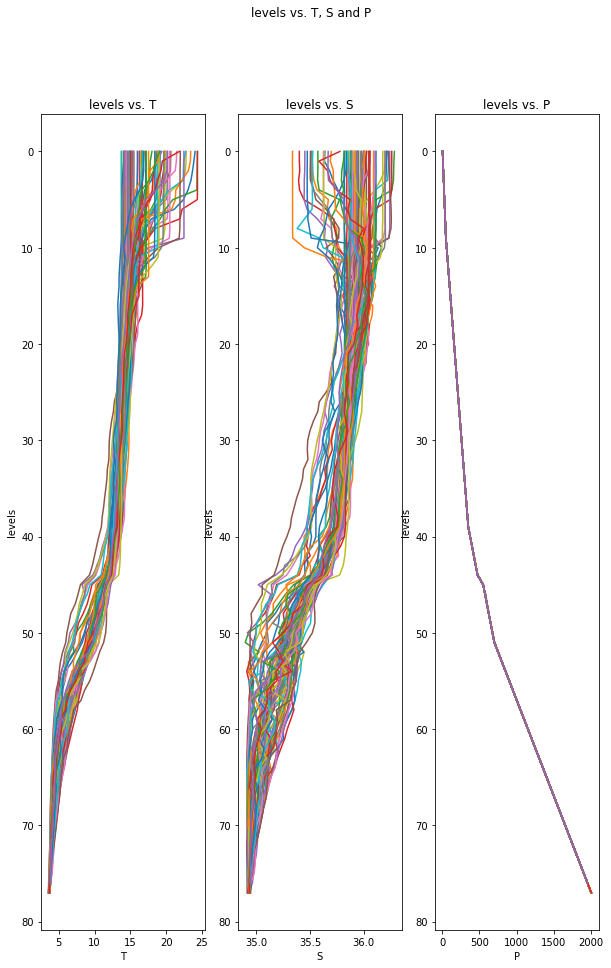

In [169]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,15))
fig.suptitle('levels vs. T, S and P')
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax1.set_title('levels vs. T')
ax2.set_title('levels vs. S')
ax3.set_title('levels vs. P')
ax1.set_xlabel('T')
ax2.set_xlabel('S')
ax3.set_xlabel('P')
ax1.set_ylabel('levels')
ax2.set_ylabel('levels')
ax3.set_ylabel('levels')
ax1.plot(T,levels)
ax2.plot(S,levels)
ax3.plot(P,levels)
plt.show()

In [110]:
ax1l = ax1.lines
ax2l = ax2.lines
ax3l = ax3.lines
len(ax1l), len(ax2l), len(ax3l)
#Checking the number of lines

(75, 75, 75)

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `levels`.

In [111]:
data = np.load('argo_float_4901412.npz')

In [112]:
lst = data.files
print(lst)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


In [130]:
T.mean(axis=1)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
        9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
        7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
        5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
        4.65368   ,  4.54237334,  4.44274664,  4.35933333,      

In [118]:
T_ma.mean(axis=1)
#Taking the mean of each row. answer of exercise

masked_array(data=[17.601726022485185, 17.572236087587143,
                   17.514583296246, 17.423263947168987,
                   17.249438377275858, 17.037301337882266,
                   16.767876611997004, 16.446095884662785,
                   16.17439195272085, 16.045013556609284,
                   15.6582702301644, 15.460729598999023,
                   15.261148620296169, 15.124891912614977,
                   14.991337827734045, 14.901608080477327,
                   14.819905435716784, 14.745351391869622,
                   14.668229708800444, 14.585026998777646,
                   14.497324337830415, 14.419040525281751,
                   14.354121633478114, 14.271027023727829,
                   14.190810822151803, 14.114878383842674,
                   14.0434729344136, 13.980675658664188,
                   13.909945951925742, 13.83274319365218,
                   13.761391961896742, 13.69836478619962,
                   13.623351316194277, 13.541851314338478,
       

In [117]:
T_ma.mean(axis=1).shape

(78,)

In [119]:
T_ma.mean(axis=0)
#Taking the mean of each column. if we were asked to take the mean for each day of measurement, not level

masked_array(data=[10.889153847327599, 10.728256402871548,
                   10.93362820148468, 10.75679484086159,
                   10.381666663365486, 10.086192357234466,
                   10.581948038819549, 10.500666706989973,
                   10.568415545797967, 10.537051216149942,
                   10.81131168154927, 11.019320518542559,
                   11.392051963063029, 11.408230729592152,
                   11.364220801886026, 11.358217966862213,
                   11.394441573650806, 11.105140979473408,
                   11.02870124965519, 10.808948684961369,
                   10.930766254276424, 11.01069231216724,
                   11.881956535836924, 10.573730780528141,
                   10.663597360833899, 10.565732374997205,
                   11.088545458657402, 10.879217918102558,
                   11.213844163077217, 11.249910284311344,
                   11.291688250256824, 11.062038482763828,
                   11.32829863684518, 11.204012791315714,
   

In [120]:
T_ma.mean(axis=0).shape

(75,)

In [122]:
S_ma.mean(axis=1)

masked_array(data=[35.906321799918395, 35.90223137537638,
                   35.9031343460083, 35.90173138512505, 35.90544583046273,
                   35.91003590413969, 35.90946014613321,
                   35.913431455011235, 35.91967711577544,
                   35.926159884478594, 35.93195456427497,
                   35.940553562061204, 35.94091595830144,
                   35.939053664336335, 35.939310692452096,
                   35.937867448136615, 35.93525793745711,
                   35.931180386929896, 35.92534328151394,
                   35.91652256733662, 35.906718950013854,
                   35.8961784259693, 35.888880188400684,
                   35.878992699288034, 35.86946183281976,
                   35.859867095947266, 35.85061712522764,
                   35.84211978396854, 35.831504667127454,
                   35.81969395199337, 35.8094506134858,
                   35.800922651548646, 35.79078674316406,
                   35.77886524715939, 35.76833627030656,
 

In [123]:
S_ma.mean(axis=1).shape

(78,)

In [124]:
P_ma.mean(axis=1)

masked_array(data=[6.434666713873545, 10.56891882097399,
                   15.54246568026608, 20.46301360979472,
                   25.425675521025788, 30.444594409014726,
                   35.443243748432884, 40.43918939538904,
                   45.408108324617956, 50.378378790778086,
                   60.472973230722786, 70.48378413432353,
                   80.40270346564216, 90.48243311289194,
                   100.51216311068148, 110.46081151189031,
                   120.52702795492637, 130.49459282127586,
                   140.51216063628326, 150.4054037558066,
                   160.40810559246992, 170.36216034760346,
                   180.41080949113174, 190.41080969733162,
                   200.39999760808172, 210.34729498785896,
                   220.32026857943148, 230.31351223507443,
                   240.28918807571, 250.41486296782622,
                   260.39999843288115, 270.36891751675995,
                   280.42432135504646, 290.4229707460146,
          

In [125]:
P_ma.mean(axis=1).shape

(78,)

In [126]:
T_ma.std(axis=1)

masked_array(data=[0.8534624992402788, 0.3734159198894175,
                   0.38353722610331104, 0.367705657806369,
                   0.5560626239592544, 0.5075490157490874,
                   0.4249263566720035, 0.6317751026773168,
                   0.4848395658804695, 0.6512503931723778,
                   0.4034641813446031, 0.4673176048944734,
                   0.5630449165866962, 0.47487075272565665,
                   0.44050135741991114, 0.5109126895728339,
                   0.2687794649407832, 0.37268006647227675,
                   0.27061120284500617, 0.29950074149001304,
                   0.42956802466010463, 0.33438257903715884,
                   0.3117377146597152, 0.37437014885243647,
                   0.346798854534107, 0.4430304505398004,
                   0.6373473265388531, 0.5152596766179852,
                   0.7018437741453122, 0.5223866960097716,
                   0.5151756655635802, 0.6140089716671858,
                   0.519824871464972, 0.493893809

In [128]:
T_ma.std(axis=1).shape

(78,)

In [127]:
S_ma.std(axis=1)

masked_array(data=[0.2177505597373686, 0.22181830628640692,
                   0.21880846568934856, 0.2166159156955439,
                   0.2084250412175509, 0.194401859863486,
                   0.18227015035769537, 0.17652957073599815,
                   0.1699385504409292, 0.16035545399914145,
                   0.13927144212727055, 0.11711354386117272,
                   0.10460508125385806, 0.09743633283016326,
                   0.09274790044344931, 0.08493033830439849,
                   0.08485860750934253, 0.0805051529133957,
                   0.07776356380880878, 0.07558179227501409,
                   0.07282218252599447, 0.07121873088612837,
                   0.07207327324888284, 0.0718756402336952,
                   0.07096564788351391, 0.07295662790220267,
                   0.07539408372953058, 0.07641816284027794,
                   0.07825997219914714, 0.08340697534053367,
                   0.08535978399731675, 0.08535099319386753,
                   0.08681939273

In [129]:
P_ma.std(axis=1)

masked_array(data=[0.8534624992402788, 0.3734159198894175,
                   0.38353722610331104, 0.367705657806369,
                   0.5560626239592544, 0.5075490157490874,
                   0.4249263566720035, 0.6317751026773168,
                   0.4848395658804695, 0.6512503931723778,
                   0.4034641813446031, 0.4673176048944734,
                   0.5630449165866962, 0.47487075272565665,
                   0.44050135741991114, 0.5109126895728339,
                   0.2687794649407832, 0.37268006647227675,
                   0.27061120284500617, 0.29950074149001304,
                   0.42956802466010463, 0.33438257903715884,
                   0.3117377146597152, 0.37437014885243647,
                   0.346798854534107, 0.4430304505398004,
                   0.6373473265388531, 0.5152596766179852,
                   0.7018437741453122, 0.5223866960097716,
                   0.5151756655635802, 0.6140089716671858,
                   0.519824871464972, 0.493893809

#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

In [158]:
T_xmean = T_ma.mean(axis=1)
S_xmean = S_ma.mean(axis=1)
P_xmean = P_ma.mean(axis=1)

T_std = T_ma.std(axis=1)
S_std = S_ma.std(axis=1)
P_std = P_ma.std(axis=1)
P_std

masked_array(data=[0.8534624992402788, 0.3734159198894175,
                   0.38353722610331104, 0.367705657806369,
                   0.5560626239592544, 0.5075490157490874,
                   0.4249263566720035, 0.6317751026773168,
                   0.4848395658804695, 0.6512503931723778,
                   0.4034641813446031, 0.4673176048944734,
                   0.5630449165866962, 0.47487075272565665,
                   0.44050135741991114, 0.5109126895728339,
                   0.2687794649407832, 0.37268006647227675,
                   0.27061120284500617, 0.29950074149001304,
                   0.42956802466010463, 0.33438257903715884,
                   0.3117377146597152, 0.37437014885243647,
                   0.346798854534107, 0.4430304505398004,
                   0.6373473265388531, 0.5152596766179852,
                   0.7018437741453122, 0.5223866960097716,
                   0.5151756655635802, 0.6140089716671858,
                   0.519824871464972, 0.493893809

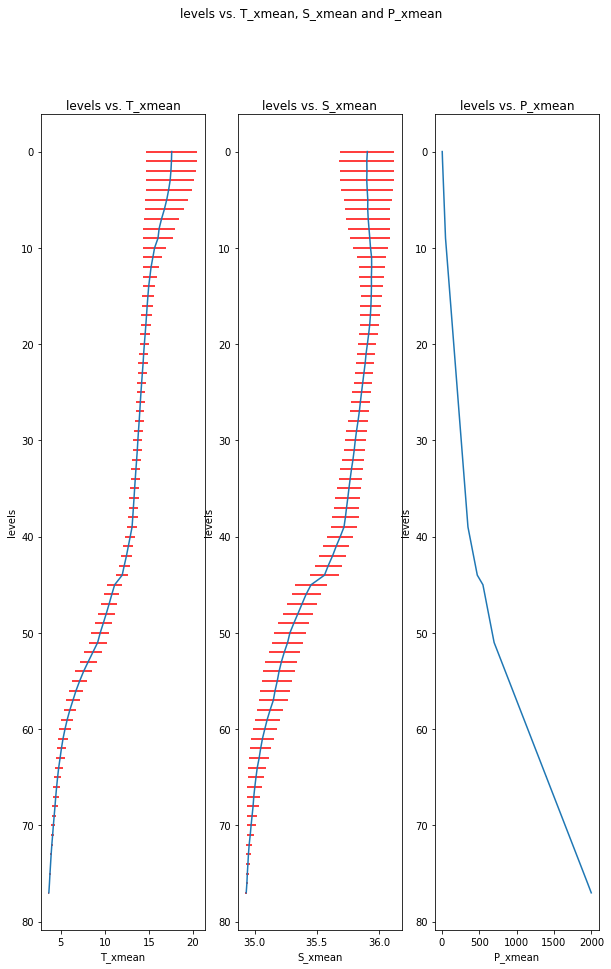

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,15))
fig.suptitle('levels vs. T_xmean, S_xmean and P_xmean')
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax1.set_title('levels vs. T_xmean')
ax2.set_title('levels vs. S_xmean')
ax3.set_title('levels vs. P_xmean')
ax1.set_xlabel('T_xmean')
ax2.set_xlabel('S_xmean')
ax3.set_xlabel('P_xmean')
ax1.set_ylabel('levels')
ax2.set_ylabel('levels')
ax3.set_ylabel('levels')
ax1.plot(T_xmean,levels)
ax2.plot(S_xmean,levels)
ax3.plot(P_xmean,levels)
T_xmeanerror = T_std
ax1.errorbar(T_xmean, levels, xerr = T_xmeanerror, fmt=' ', ecolor='R')
ax2.errorbar(S_xmean, levels, xerr = S_xmeanerror, fmt=' ',ecolor='R')
ax3.errorbar(P_xmean, levels, xerr = P_xmeanerror, fmt=' ', ecolor='R')
plt.show()


#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [170]:
T_ma.mean(axis=0)

masked_array(data=[10.889153847327599, 10.728256402871548,
                   10.93362820148468, 10.75679484086159,
                   10.381666663365486, 10.086192357234466,
                   10.581948038819549, 10.500666706989973,
                   10.568415545797967, 10.537051216149942,
                   10.81131168154927, 11.019320518542559,
                   11.392051963063029, 11.408230729592152,
                   11.364220801886026, 11.358217966862213,
                   11.394441573650806, 11.105140979473408,
                   11.02870124965519, 10.808948684961369,
                   10.930766254276424, 11.01069231216724,
                   11.881956535836924, 10.573730780528141,
                   10.663597360833899, 10.565732374997205,
                   11.088545458657402, 10.879217918102558,
                   11.213844163077217, 11.249910284311344,
                   11.291688250256824, 11.062038482763828,
                   11.32829863684518, 11.204012791315714,
   

In [171]:
S_ma.mean(axis=0)

masked_array(data=[35.43004079965445, 35.394650043585365,
                   35.41946508945563, 35.36729093698355,
                   35.31889211214506, 35.2947869912172, 35.3610051142705,
                   35.371249076647636, 35.348913068895214,
                   35.34899848546737, 35.407299537163276,
                   35.429660992744644, 35.51981814495929,
                   35.53971168322441, 35.54430528120561,
                   35.568458508222534, 35.580664696631494,
                   35.55401357014974, 35.53921969525226,
                   35.50498659182818, 35.508786585423856,
                   35.532285983745865, 35.630452473958336,
                   35.493727512848686, 35.51774290010527,
                   35.52225048441282, 35.5843391418457, 35.56759266975598,
                   35.607619743842584, 35.61186756231846,
                   35.596342359270366, 35.57222195160695,
                   35.58171032001446, 35.56442378117488,
                   35.56478292291815, 35

In [172]:
P_ma.mean(axis=0)

masked_array(data=[624.3589836145059, 624.2961469246791, 624.323069596902,
                   624.2653782184308, 624.3410352376791,
                   624.4115441762484, 606.4337606801615,
                   624.2923007683876, 606.4558348222213,
                   624.3436021071213, 606.7623396724849,
                   624.5500078568092, 606.4701386179242,
                   624.4692398340275, 606.4610469434168, 624.285890132953,
                   606.8012913171347, 624.3820602037968,
                   606.6026071882867, 624.4692392043578,
                   606.4090973061401, 624.2705021882668,
                   470.99999720808387, 624.5089830251841,
                   606.5116955521819, 624.5423083549891,
                   606.7285737619771, 624.5653848586938,
                   606.6168943442308, 624.4589820947402,
                   606.5987081218076, 624.3115346309467,
                   606.4987085020388, 624.4948830787952,
                   606.4168755915258, 624.435904148

In [173]:
T_ma.std(axis=0)

masked_array(data=[4.89535810255205, 4.8885261170614775,
                   5.097315183722291, 5.19962520585166,
                   5.0938869511189075, 5.167562565970618,
                   5.238761806831795, 5.120728008927176,
                   5.268106071254436, 5.11511809607561,
                   4.8352138665330395, 4.918801845173944,
                   4.833900730540038, 4.874003540446179,
                   4.658193596474646, 4.787454820100215,
                   4.685066845276402, 4.56668546213728, 4.420159295376317,
                   4.46048972254775, 4.35611427381166, 4.484970843620688,
                   3.851268127295262, 4.229868915276076,
                   4.197559812421476, 4.379575436090668,
                   4.105224720740217, 4.1646382669468665,
                   4.33895595170658, 4.313593976549693, 4.331236620380803,
                   4.333167585243396, 4.460266533878591,
                   4.680751388292176, 4.593097779880245,
                   4.9237236971897

In [174]:
S_ma.std(axis=0)

masked_array(data=[0.39888194670038635, 0.37586638569230013,
                   0.3931228762159327, 0.37443595731458634,
                   0.3366237967445158, 0.33446605284189385,
                   0.332937301826425, 0.3433194659268001,
                   0.3304095373520653, 0.3458870912649335,
                   0.3665634256254318, 0.4064805174932741,
                   0.38927523184488794, 0.411579964539575,
                   0.4046819189492039, 0.4347044649250537,
                   0.4348605182340846, 0.4159093755131318,
                   0.4005228641638964, 0.38946396553998835,
                   0.37580406075841194, 0.3976950211996827,
                   0.3566739695538276, 0.3710887216681823,
                   0.386696619976922, 0.41050203219876297,
                   0.3756960604377477, 0.381816762012706,
                   0.4107009381573686, 0.392884662066057,
                   0.38509814067383114, 0.380551575947263,
                   0.37642407884147977, 0.39141751745

In [175]:
P_ma.std(axis=0)

masked_array(data=[594.5813316265867, 594.6673030705625, 594.618422881474,
                   594.6113135043367, 594.6848827262625,
                   594.7033122547649, 577.4368865270592,
                   594.6203439554528, 577.3752077693555,
                   594.6846059839329, 577.3606561652439,
                   594.7817370821355, 577.4117863725363,
                   594.7179755259236, 577.4465954123355,
                   594.6596453096502, 577.4382212680143,
                   594.6828530988887, 577.4598369987373,
                   594.8048631142178, 577.4223072996349,
                   594.6774733244184, 439.91567483466804,
                   594.7494324104979, 577.5396288212446,
                   594.7776998769001, 577.3995558572358,
                   594.7343034311523, 577.4458354189074,
                   594.6070748166628, 577.3919921694048,
                   594.7262089648216, 577.3712655518873,
                   594.6966228691041, 577.4896693359658,
            

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

In [176]:
T_ymean = T_ma.mean(axis=0)
S_ymean = S_ma.mean(axis=0)
P_ymean = P_ma.mean(axis=0)

T_std = T_ma.std(axis=0)
S_std = S_ma.std(axis=0)
P_std = P_ma.std(axis=0)

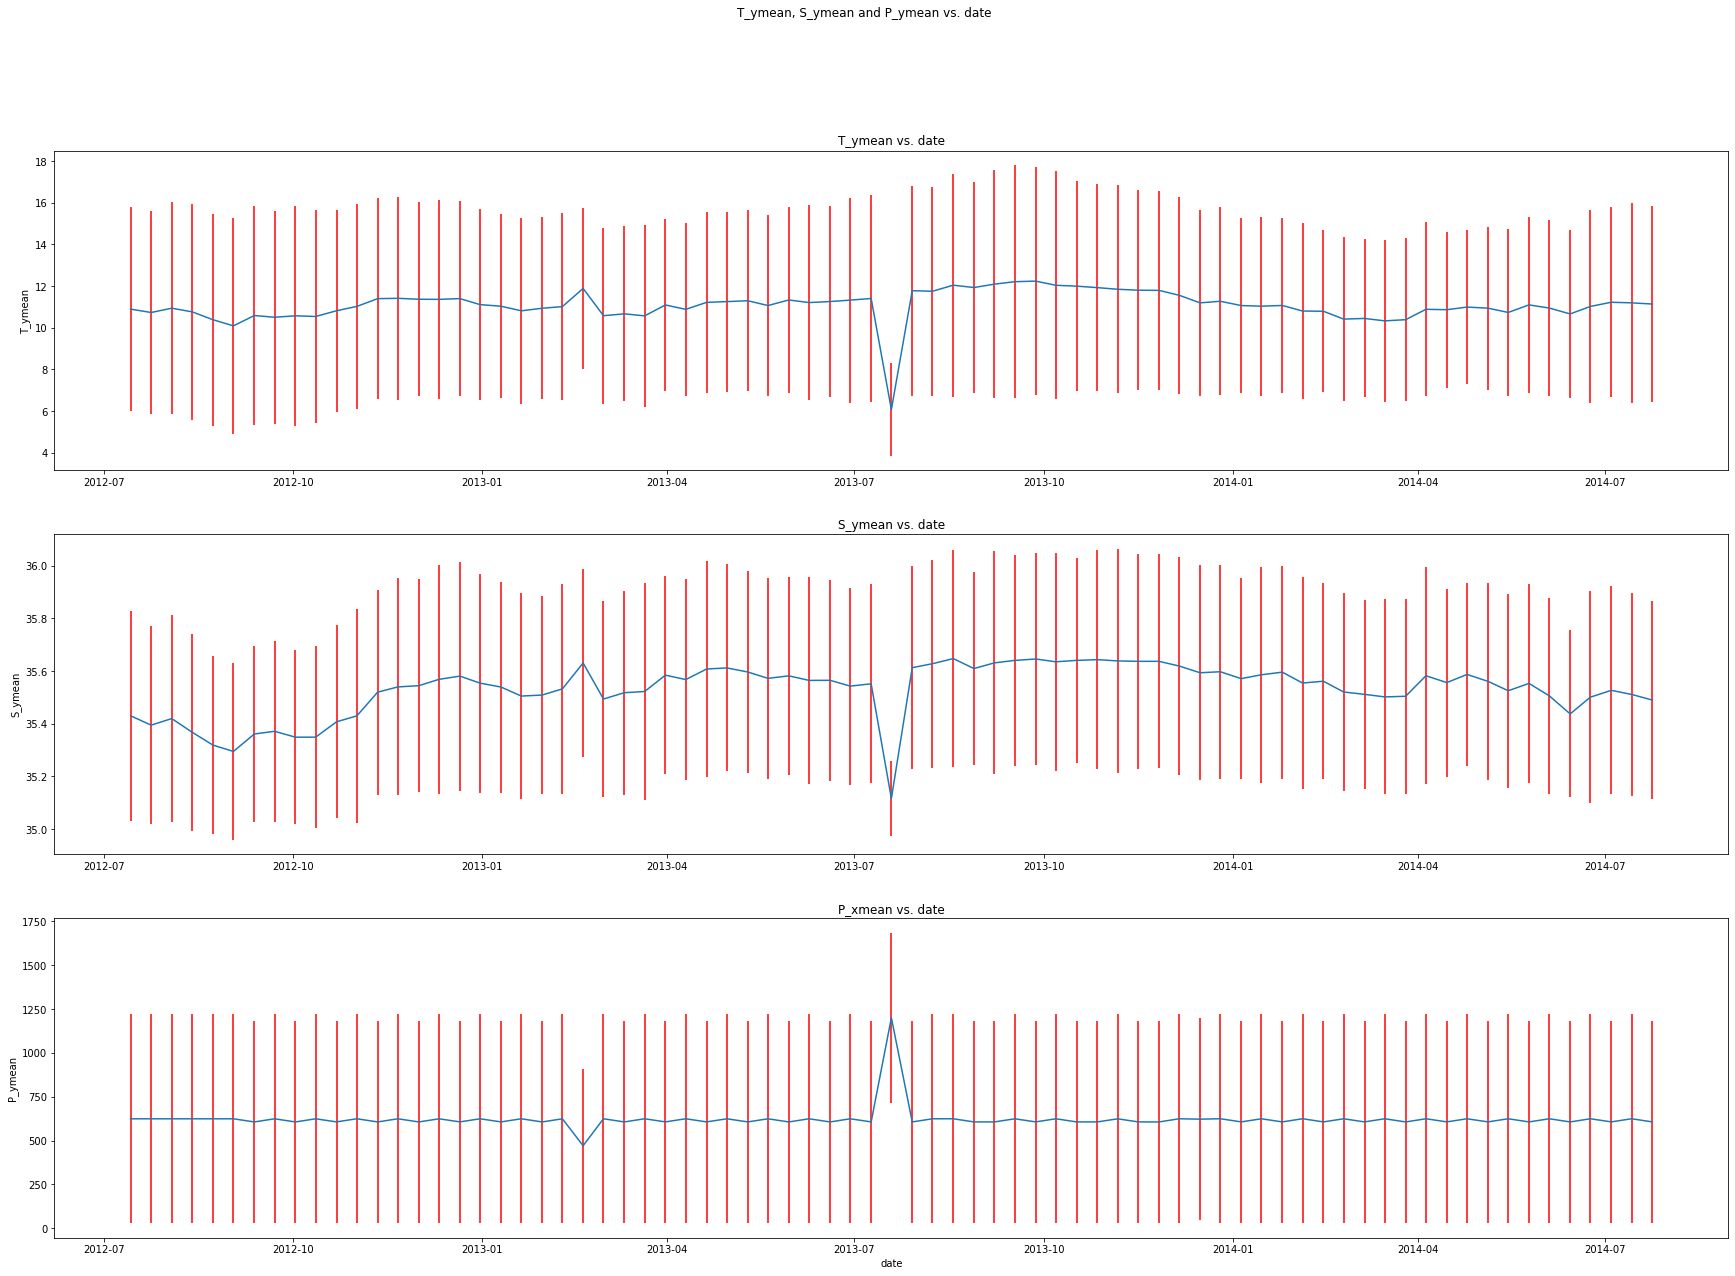

In [200]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(30,20))
fig.suptitle('T_ymean, S_ymean and P_ymean vs. date')
ax1.set_title('T_ymean vs. date')
ax2.set_title('S_ymean vs. date')
ax3.set_title('P_xmean vs. date')
ax1.set_ylabel('T_ymean')
ax2.set_ylabel('S_ymean')
ax3.set_ylabel('P_ymean')
ax3.set_xlabel('date')
ax1.plot(date,T_ymean)
ax2.plot(date,S_ymean)
ax3.plot(date,P_ymean)
T_ymeanerror = T_std
S_ymeanerror = S_std
P_ymeanerror = P_std
ax1.errorbar(date,T_ymean, yerr = T_ymeanerror, fmt=' ', ecolor='R')
ax2.errorbar(date,S_ymean, yerr = S_ymeanerror, fmt=' ',ecolor='R')
ax3.errorbar(date,P_ymean, yerr = P_ymeanerror, fmt=' ', ecolor='R')
plt.show()


#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

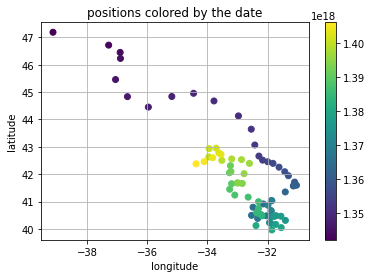

In [202]:
plt.scatter(lon, lat, c=date)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('positions colored by the date')
plt.grid()
plt.colorbar()

## 2 Matrix  multiplication
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 

*Matrix Multiplication.* In this exercise you will create two square matrices $A$ and $B$ with dimensions $n \times n$. You will then use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) to compute their product with the results being stored in matrix $C$. Thus, you will be computing the matrix equation $C = AB$. Note that matrix multiplication is different from element by element array multiplication. See the [wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) if you are unsure what matrix multiplication is.

Use three nested `for` loops to *explicitly* perform the matrix multiplication. The inner most loop calculates element `C[i,j]` which is equal to the sum of `A[i,k]*B[k,j]` over all values of index `k` from `0` to `n-1`. The two outer loops iterate over `i` and `j`.

#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

How much faster is using NumPy's `dot()` compared your `myMatrixMultiply` function? 

Now time how long it takes for n = 1000